<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Cohort_Analysis_for_assessing_customer_retention_in_E_commerce_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# load dataset

!pip install gdown

import gdown

#https://drive.google.com/file/d/1Qcv0zLbEjb57A_sEv-MxxTPOar_NVI5f/view?usp=sharing

file_id = '1Qcv0zLbEjb57A_sEv-MxxTPOar_NVI5f'

output_file = 'Dataset_ecommerce.csv'

gdown.download(id = file_id, output = output_file, quiet=False)

df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1Qcv0zLbEjb57A_sEv-MxxTPOar_NVI5f
To: /content/Dataset_ecommerce.csv
100%|██████████| 36.1M/36.1M [00:00<00:00, 40.0MB/s]


In [35]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [36]:
# describe stat
df.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [37]:
# check for missing values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [38]:
# drop missing values
df.dropna(inplace = True)

In [39]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [40]:
# check for info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [41]:
# convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

**Exploratory Data Analysis**

Analysis by country

In [57]:
quantity_by_country = df.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending=False).reset_index()


In [58]:
quantity_by_country.max()

index             27
Country     Zimbabwe
Quantity      741223
dtype: object

In [55]:
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


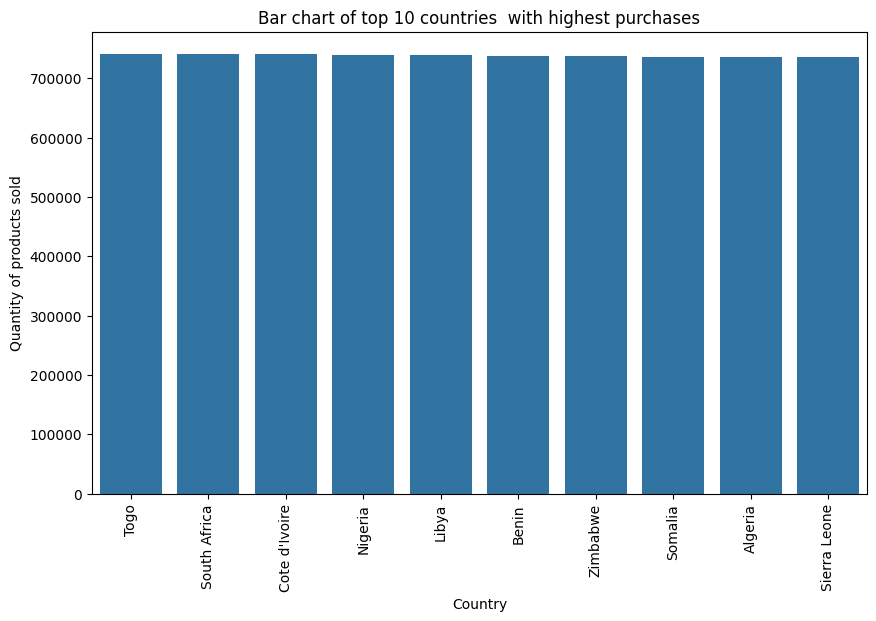

In [44]:
# visualize the top 10  countries where most products are sold
top_10_countries = quantity_by_country.head(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = top_10_countries)

plt.title('Bar chart of top 10 countries  with highest purchases')
plt.xlabel('Country')
plt.ylabel('Quantity of products sold')
plt.xticks(rotation = 90)
plt.show()
plt.close('all')

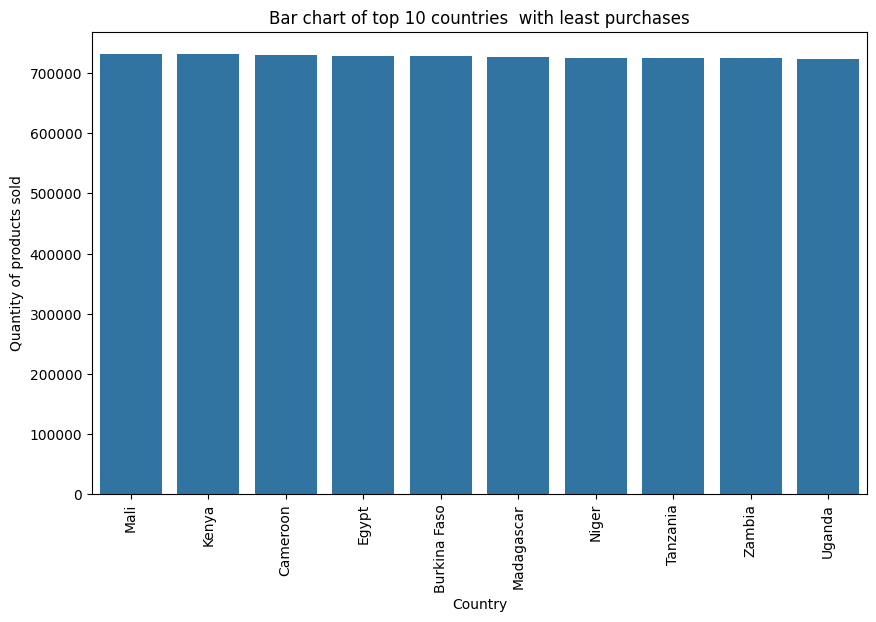

In [45]:
# visualize  countries where  least number  products are sold
least_10_countries = quantity_by_country.tail(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Country', y = 'Quantity', data = least_10_countries)

plt.title('Bar chart of top 10 countries  with least purchases')
plt.xlabel('Country')
plt.ylabel('Quantity of products sold')
plt.xticks(rotation = 90)
plt.show()
plt.close('all')

Analysis of countries and number of customers

In [46]:
country_to_customer = df.groupby('Country')['CustomerID'].nunique().reset_index()
country_to_customer = country_to_customer.sort_values(by = 'CustomerID', ascending = False).reset_index()

In [47]:
country_to_customer.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


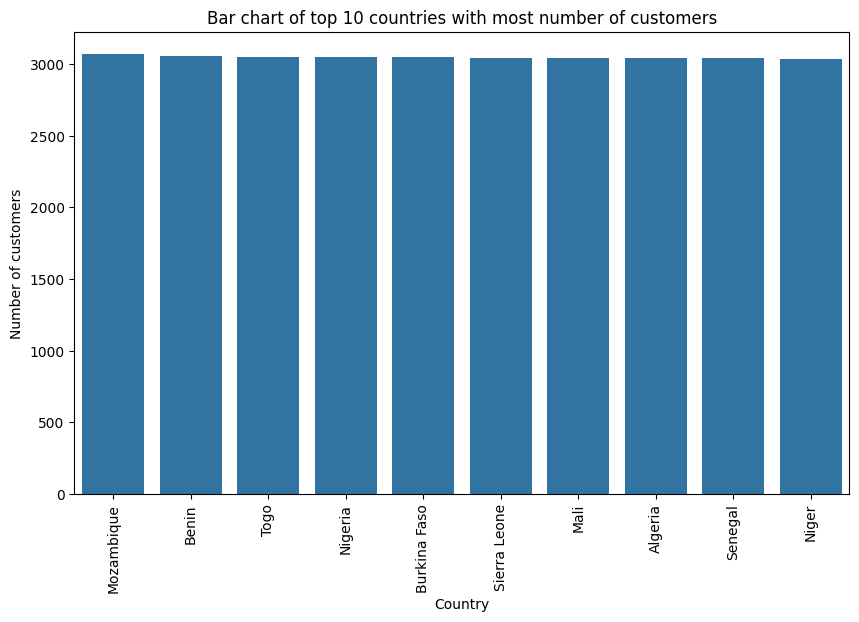

In [48]:
# Draw a plot   of top 10 countries with most number of customers

top_10_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Country', y = 'CustomerID', data = top_10_countries_to_customer)

plt.title('Bar chart of top 10 countries with most number of customers')
plt.xlabel('Country')
plt.ylabel('Number of customers')
plt.xticks(rotation = 90)
plt.show()
plt.close('all')

Sales trend visualization

In [62]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

In [64]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

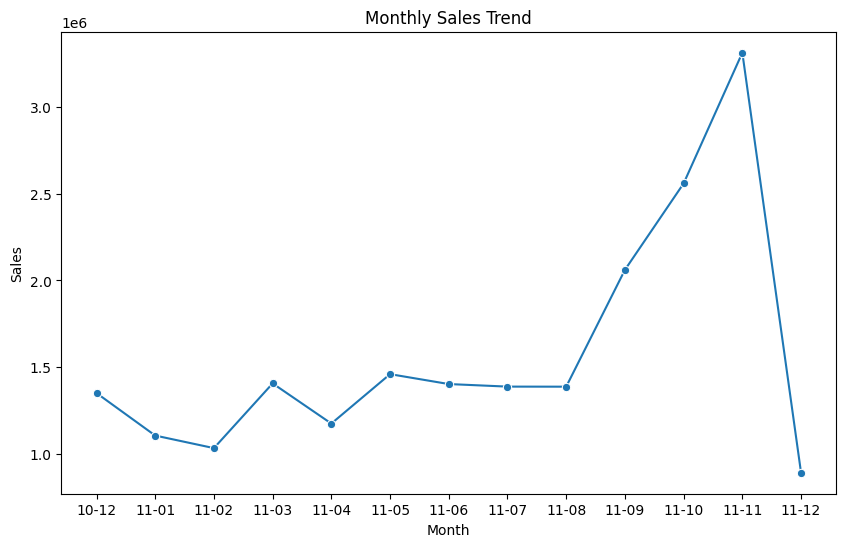

In [65]:
# create a line
plt.figure(figsize = (10, 6))
sns.lineplot(marker = 'o', linestyle= '-', y = monthly_sales.values, x = monthly_sales.index.strftime("%y-%m"))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
plt.close('all')